In [79]:
# https://www.kaggle.com/lachmann12/correcting-under-reported-covid-19-case-numbers/data
# The Center for Systems Science and Engineering (CSSE) at Johns Hopkins
# https://systems.jhu.edu/research/public-health/ncov/

In [ ]:
# https://www.fullstackpython.com/blog/learn-pandas-basic-commands-explore-covid-19-data.html
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests
from os.path import join
import datetime as dt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# from plotly import tools
# import plotly.figure_factory as ff

# import warnings
# warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

downloads = 'C:/Users/balob/Downloads'
world_demographics = 'world_demographics.csv'

# for dirname, _, filenames in os.walk(downloads):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [54]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
# recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

url = confirmed_url
s = requests.get(url).content
cases = pd.read_csv(io.StringIO(s.decode('utf-8')))

url = deaths_url
s = requests.get(url).content
deaths = pd.read_csv(io.StringIO(s.decode('utf-8')))

# url = recovered_url
# s = requests.get(url).content
# recovered = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [55]:
cases['Country/Region'] = cases['Country/Region'].replace('Iran (Islamic Republic of)', 'Iran')
cases['Country/Region'] = cases['Country/Region'].replace('Taiwan*', 'Taiwan')
cases['Country/Region'] = cases['Country/Region'].replace('Criuse Ship', 'Diamond Princess')
cases['Country/Region'] = cases['Country/Region'].replace('Korea, South', 'South Korea')

deaths['Country/Region'] = deaths['Country/Region'].replace('Iran (Islamic Republic of)', 'Iran')
deaths['Country/Region'] = deaths['Country/Region'].replace('Taiwan*', 'Taiwan')
deaths['Country/Region'] = deaths['Country/Region'].replace('Criuse Ship', 'Diamond Princess')
deaths['Country/Region'] = deaths['Country/Region'].replace('Korea, South', 'South Korea')

#recovered['Country/Region'] = recovered['Country/Region'].replace('Iran (Islamic Republic of)', 'Iran')
#recovered['Country/Region'] = recovered['Country/Region'].replace('Taiwan*', 'Taiwan')
#recovered['Country/Region'] = recovered['Country/Region'].replace('Criuse Ship', 'Diamond Princess')
#recovered['Country/Region'] = recovered['Country/Region'].replace('Korea, South', 'South Korea')

countries = cases.iloc[:,1].unique()
countries.sort()

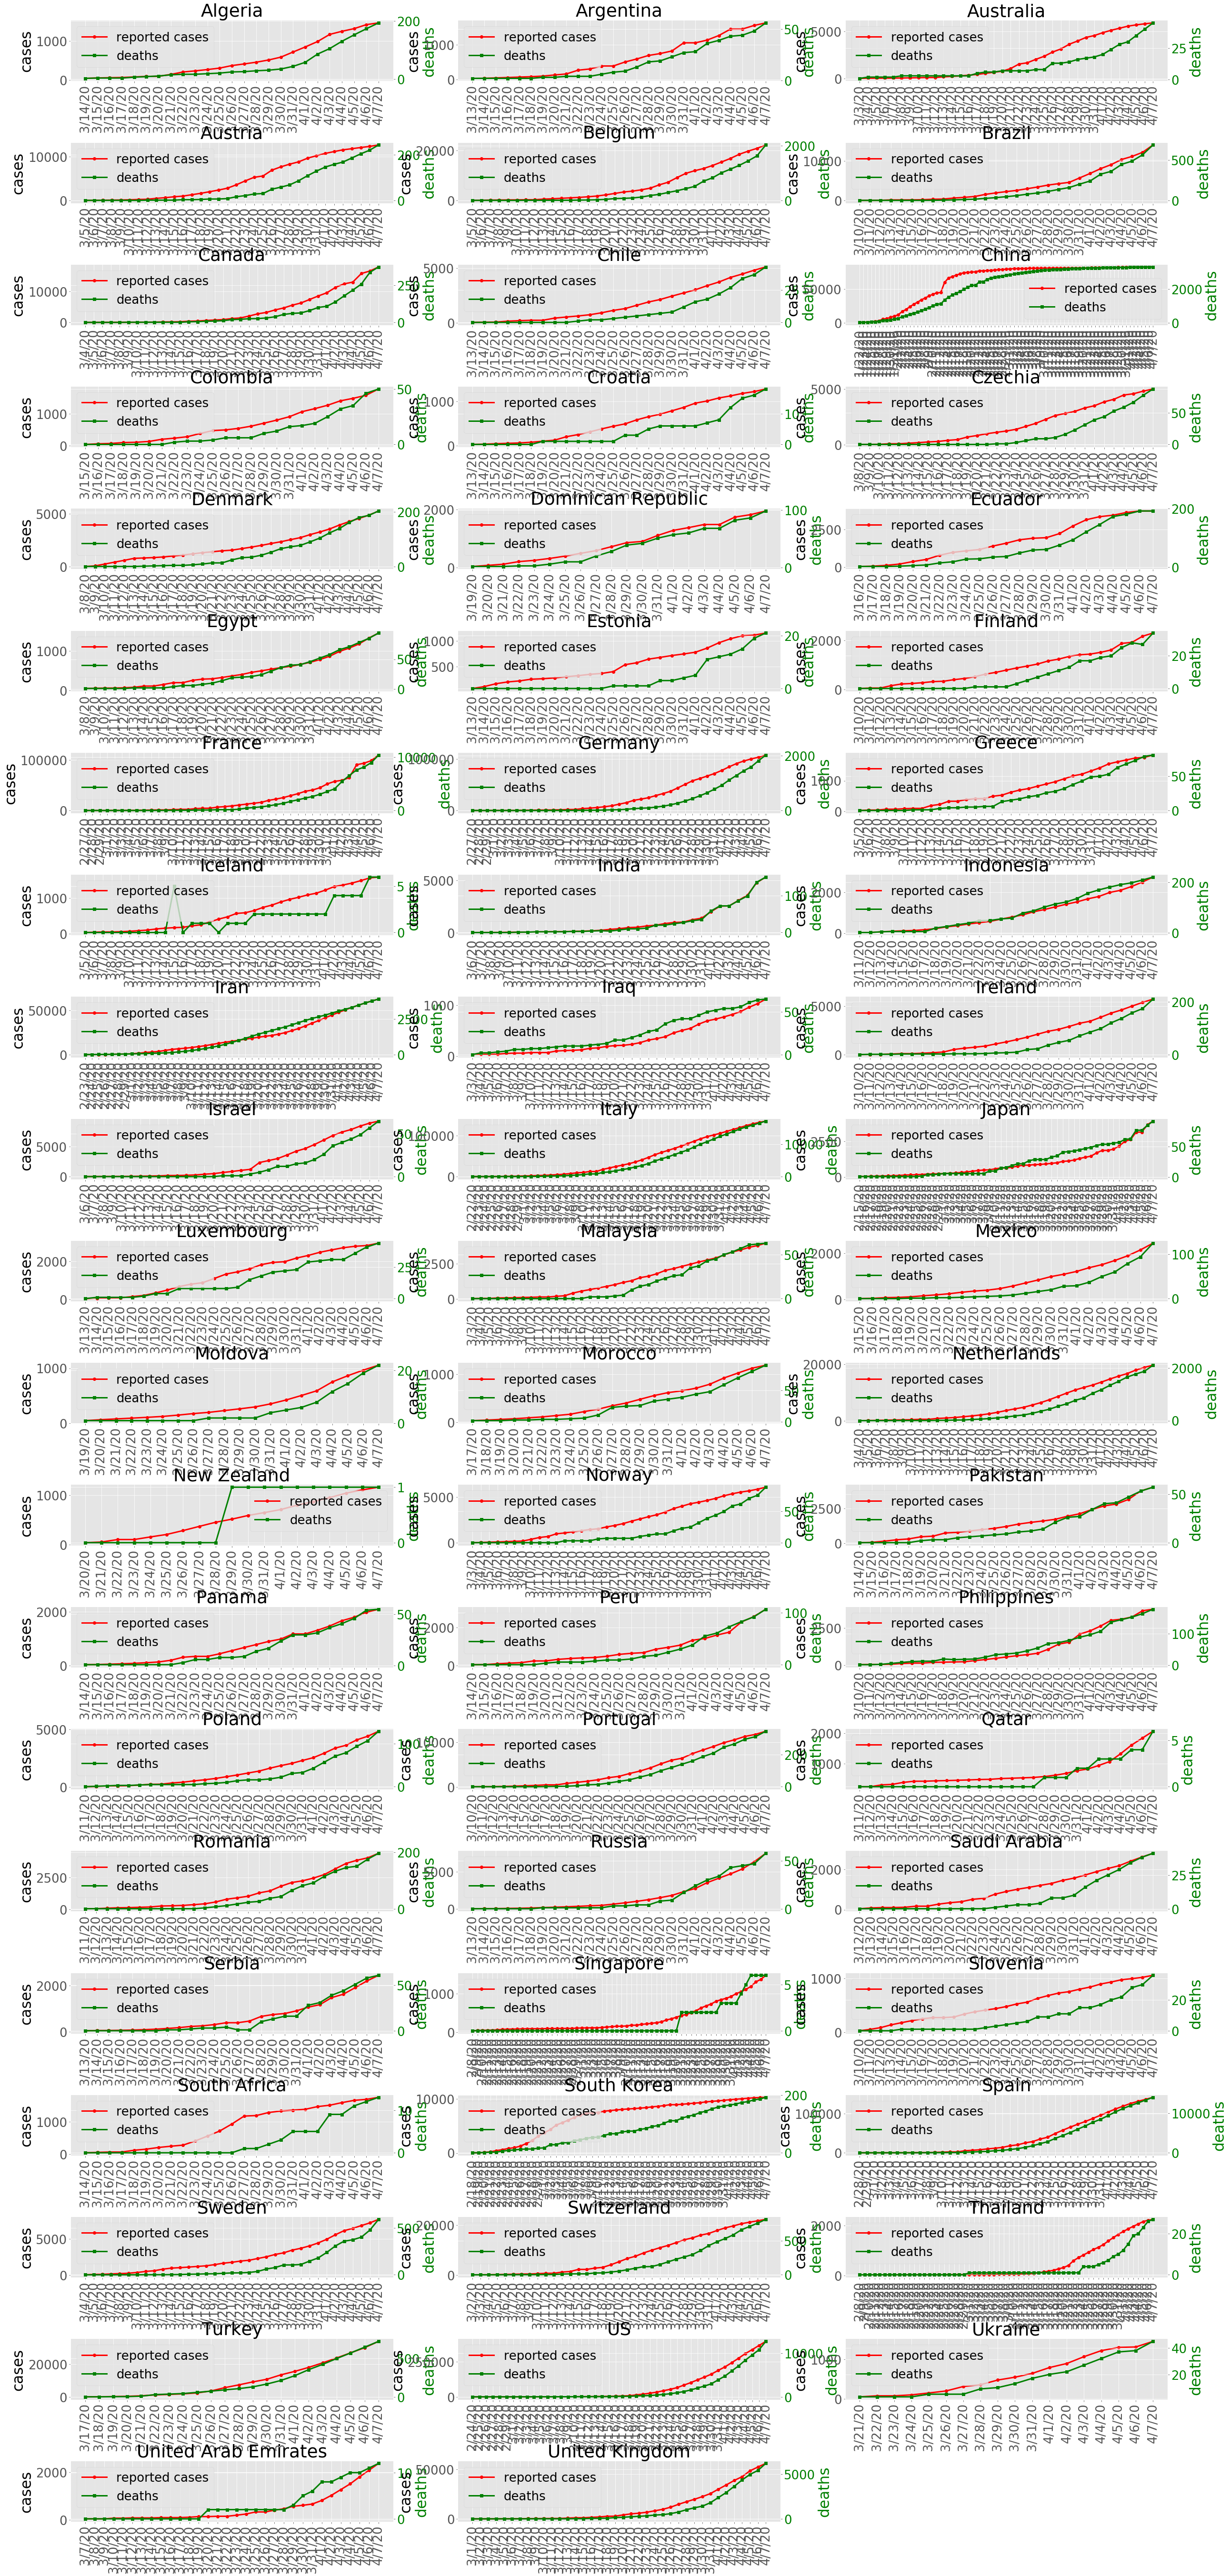

In [6]:
counter = 0

plt.figure(figsize=(16, 70))
plt.tight_layout(pad=3.0)

plt.rcParams.update({'font.size': 26})

for country in countries:
    c_count = cases.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)
    d_count = deaths.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)
    
    if np.max(c_count) > 1000:
        sig_cases = np.where(c_count > 30)[0]
        counter = counter + 1
        ax1 = plt.subplot(30, 3, counter)
        res1, = plt.plot(c_count[sig_cases], 'ro-', linewidth=3, label="reported cases")
        #res2, = plt.plot(r_count[sig_cases], 'b^-', linewidth=3, label="recovered")
        plt.xticks(rotation=90)
        ax2 = ax1.twinx()
        res3, = ax2.plot(d_count[sig_cases], 'gs-', linewidth=3, label="deaths")
        
        plt.title(country)
        ax1.set_ylabel('cases', color="black")
        color = 'green'
        ax2.set_ylabel('deaths', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        plt.legend(handles=[res1, res3])

plt.subplots_adjust(left=0, right=2, top=2, bottom=0.5, hspace=1)
plt.show()

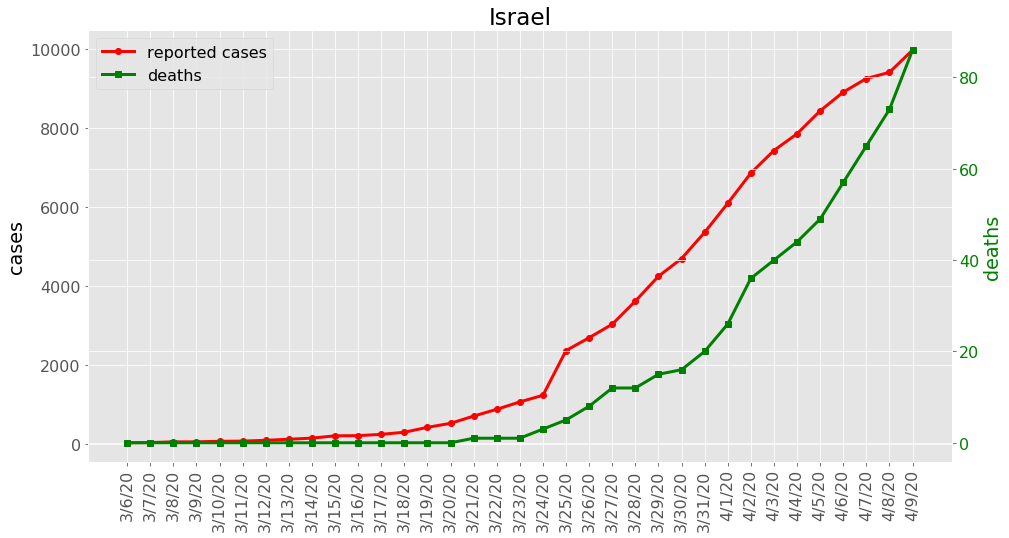

In [37]:
plt.rcParams.update({'font.size': 16})

country = "Russia"
country = "Italy"
country = "Israel"
# country = "Germany"
# country = "Australia"
# country = "China"

significant = True
sit_threshold = 30

c_count = cases.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)
d_count = deaths.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)

if significant:
    sig_cases = np.where(c_count > sit_threshold)[0]
    c_count = c_count[sig_cases]
    d_count = d_count[sig_cases]

ax1 = plt.subplot(111)
res1, = plt.plot(c_count, 'ro-', linewidth=3, label="reported cases")
plt.xticks(rotation=90)
ax2 = ax1.twinx()
res3, = ax2.plot(d_count, 'gs-', linewidth=3, label="deaths")
plt.title(country)
ax1.set_ylabel('cases', color="black")
ax2.set_ylabel('deaths', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.legend(handles=[res1, res3])
plt.subplots_adjust(left=0, right=2, top=2, bottom=0.5, hspace=1)
plt.show()

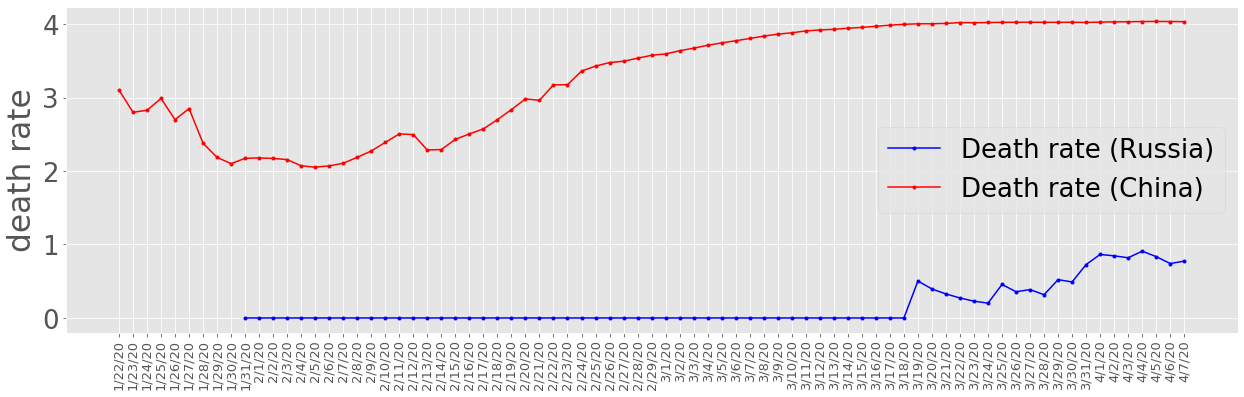

In [20]:
# country1 = "Italy" # target country
country1 = "Russia" # target country
country2 = "China" # benchmark country

country = country1
country_count = cases.iloc[(cases["Country/Region"] == country).values, 4:].sum(axis=0)
country_deaths = deaths.iloc[(deaths["Country/Region"] == country).values, 4:].sum(axis=0)
dr_c1 = country_deaths / country_count

country = country2
country_count = cases.iloc[(cases["Country/Region"] == country).values, 4:].sum(axis=0)
country_deaths = deaths.iloc[(deaths["Country/Region"] == country).values, 4:].sum(axis=0)
dr_c2 = country_deaths / country_count

plt.figure(figsize=(21,6))
plt.rc('ytick', labelsize=26) 
plt.rc('xtick', labelsize=13)

res1, = plt.plot(dr_c1 * 100, 'b.-', label="Death rate ("+country1+")")
res2, = plt.plot(dr_c2 * 100, 'r.-', label="Death rate ("+country2+")")

plt.ylabel("death rate")
plt.xticks(rotation=90)
plt.legend(handles=[res1, res2])
plt.show()

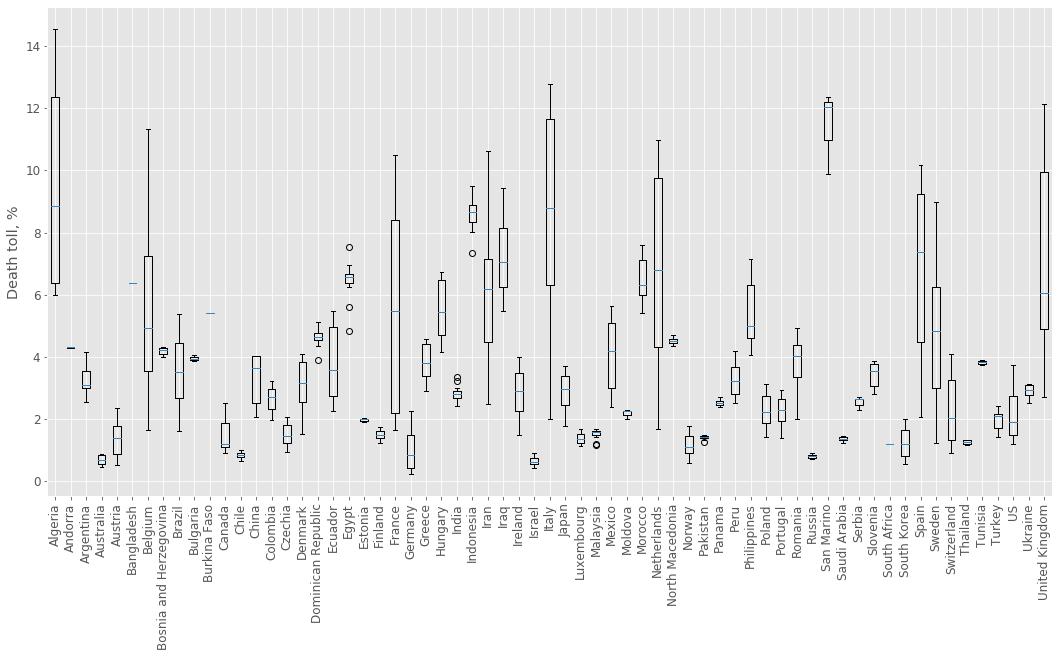

In [58]:
plt.rcParams.update({'font.size': 12})

dr_list = []
dr_countries = []
death_threshold = 23
for country in countries:
    country_count = cases.iloc[(cases["Country/Region"] == country).values, 4:].sum(axis=0)
    country_deaths = deaths.iloc[(deaths["Country/Region"] == country).values, 4:].sum(axis=0)
    dr = country_deaths / country_count
    d_cases = np.where(country_deaths > death_threshold)[0]
    if len(d_cases) > 0:
        dr_list.append(dr[d_cases] * 100)
        dr_countries.append(country)

country = 'Italy'
country_count = cases.iloc[(cases["Country/Region"] == country).values, 4:].sum(axis=0)
country_deaths = deaths.iloc[(deaths["Country/Region"] == country).values, 4:].sum(axis=0)
dr = country_deaths / country_count
d_cases = np.where(country_deaths > death_threshold)[0]

plt.figure(figsize=(18,9))
x = dr_list
plt.boxplot(x)
plt.xticks(range(1, len(dr_countries)+1), dr_countries)
plt.xticks(rotation=90)
plt.ylabel('Death toll, %')
plt.show()

### Developments

Сделать:
1. Динамика кол-ва стран с эпидемией
2. Процентное отношение населения к кол-ву заболевших

In [17]:
deaths.loc[deaths['Country/Region'].str.startswith("Rus", na=False)].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
192,NaN,Russia,60.0,90.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
cases.loc[cases['Country/Region'].str.startswith("Rus", na=False)].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
187,NaN,Russia,60.0,90.0,0,0,0,0,0,0,...,306,367,438,495,658,840,1036,1264,1534,1836


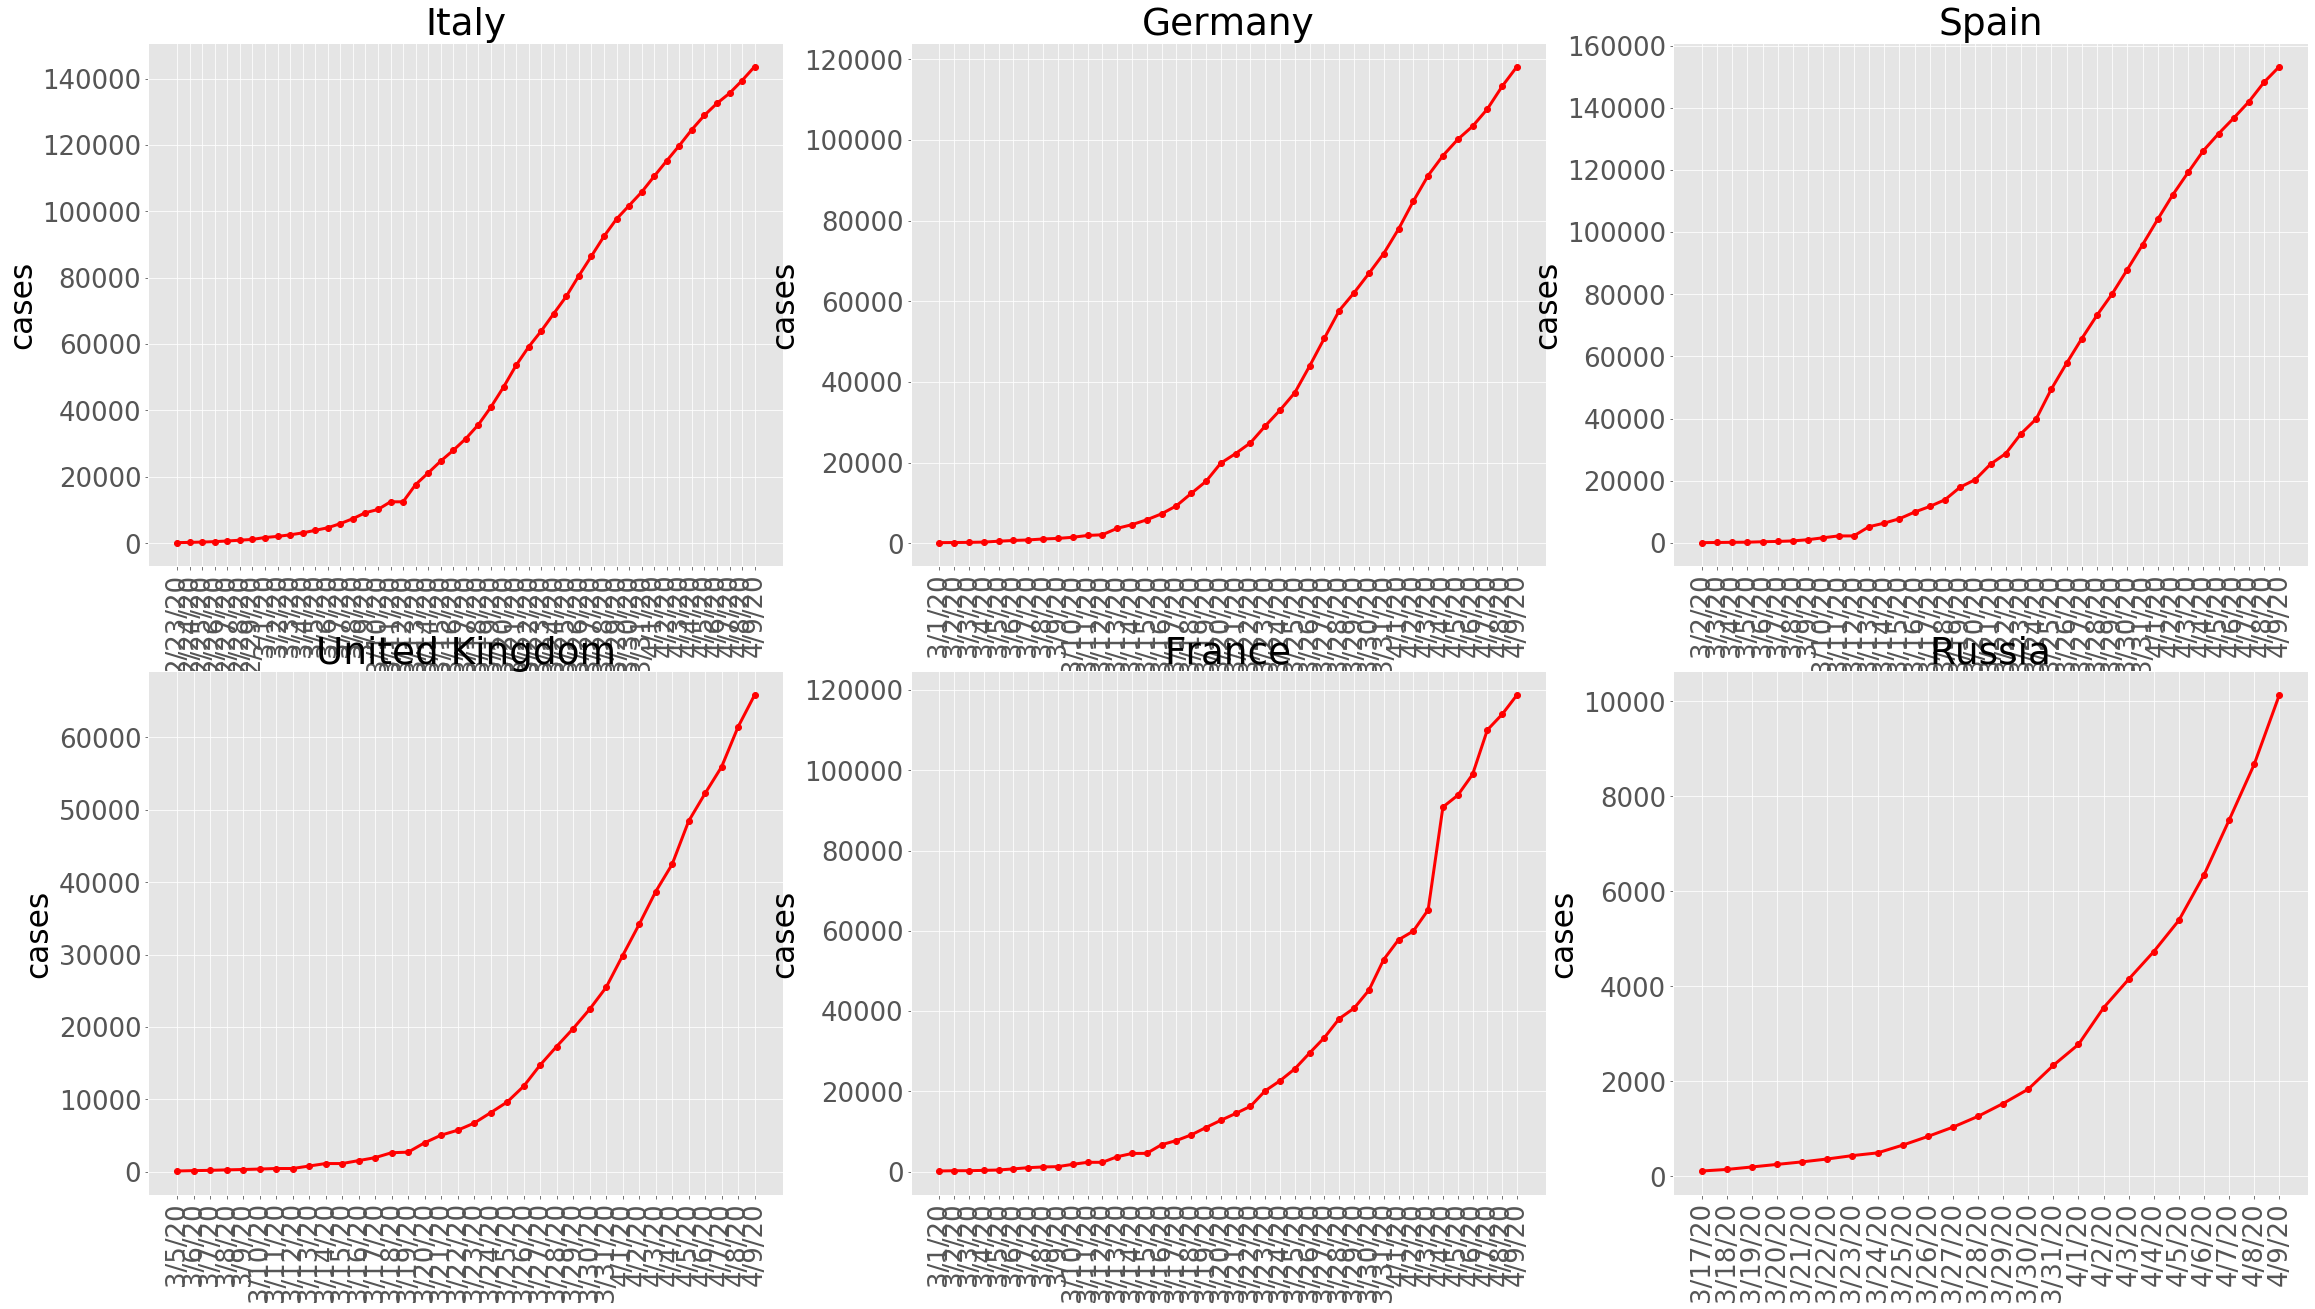

In [4]:
counter = 0

plt.figure(figsize=(12,32))
plt.tight_layout(pad=3.0)

plt.rcParams.update({'font.size': 26})

countries = ['Italy', 'Germany', 'Spain', 'United Kingdom', 'France', 'Russia']

for country in countries:
    c_count = cases.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)
    d_count = deaths.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)
    
    sig_cases = np.where(c_count > 100)[0]
    counter = counter + 1
    ax1 = plt.subplot(2, 3, counter)
    res1, = plt.plot(c_count[sig_cases], 'ro-', linewidth=3, label="reported cases")
    #res2, = plt.plot(r_count[sig_cases], 'b^-', linewidth=3, label="recovered")
    plt.xticks(rotation=90)
#     ax2 = ax1.twinx()
#     res3, = ax2.plot(d_count[sig_cases], 'gs-', linewidth=3, label="deaths")

    plt.title(country)
    ax1.set_ylabel('cases', color="black")
#     color = 'green'
#     ax2.set_ylabel('deaths', color=color)
#     ax2.tick_params(axis='y', labelcolor=color)
#     plt.legend(handles=[res1, res3])

plt.subplots_adjust(left=0, right=2.5, top=1, bottom=0.5)
plt.show()

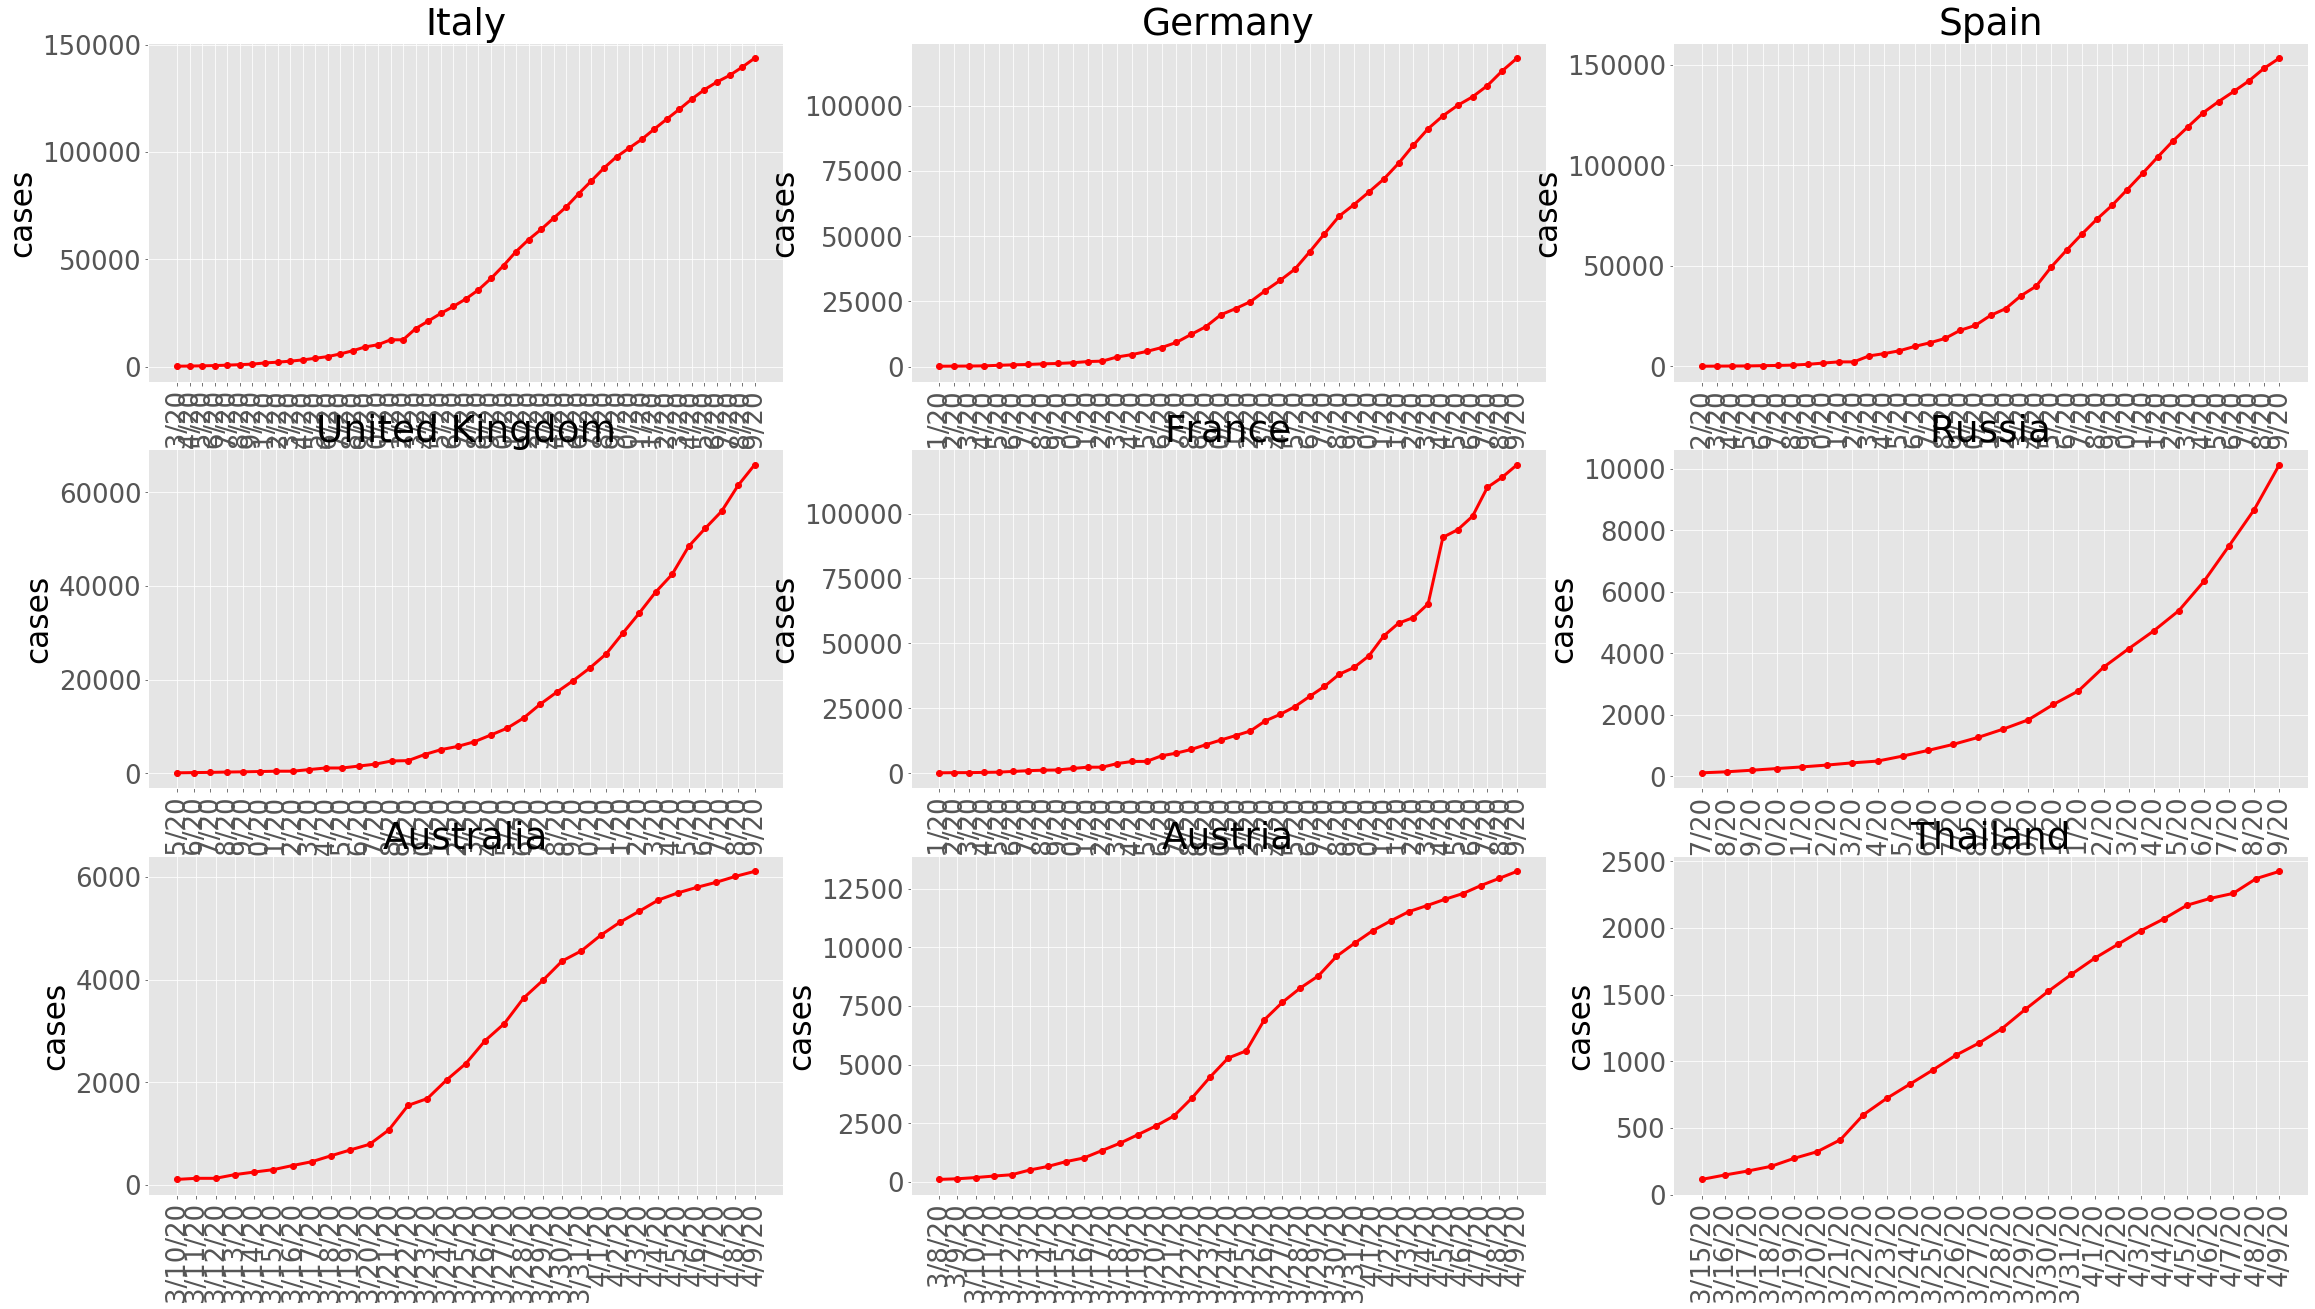

In [5]:
counter = 0

plt.figure(figsize=(12,32))
plt.tight_layout(pad=3.0)

plt.rcParams.update({'font.size': 26})

countries = ['Italy', 'Germany', 'Spain', 'United Kingdom', 'France', 'Russia', 'Australia', 'Austria', 'Thailand']

for country in countries:
    c_count = cases.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)
    d_count = deaths.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)
    
    sig_cases = np.where(c_count > 100)[0]
    counter = counter + 1
    ax1 = plt.subplot(3, 3, counter)
    res1, = plt.plot(c_count[sig_cases], 'ro-', linewidth=3, label="reported cases")
    plt.xticks(rotation=90)
    plt.title(country)
    ax1.set_ylabel('cases', color="black")
plt.subplots_adjust(left=0, right=2.5, top=1, bottom=0.5)
plt.show()

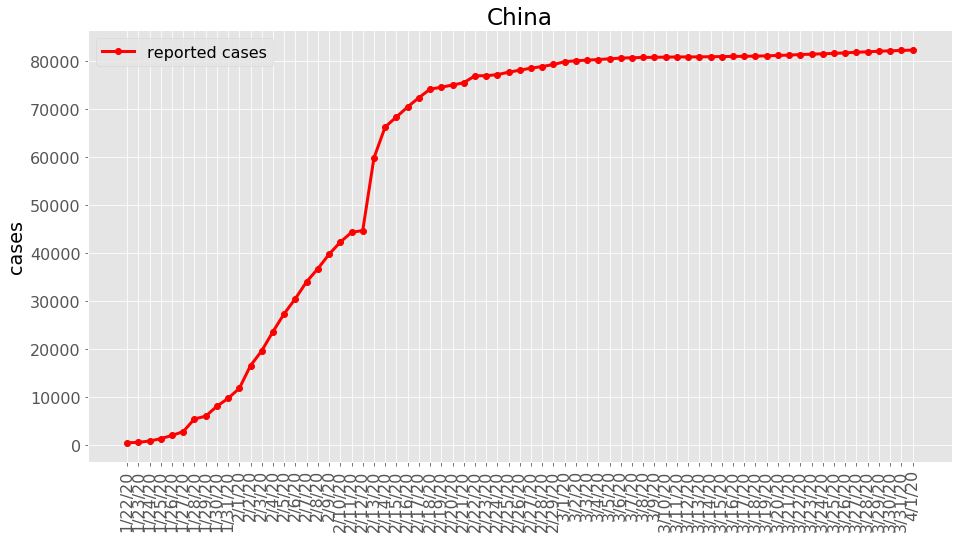

In [5]:
plt.rcParams.update({'font.size': 16})

# plt.rcParams.update({'font.size': 26})

country = "Russia"
country = "China"
# country = "Italy"

significant = True
sit_threshold = 10

c_count = cases.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)
d_count = deaths.iloc[(cases['Country/Region'] == country).values, 4:].sum(axis=0)

if significant:
    sig_cases = np.where(c_count > sit_threshold)[0]
    c_count = c_count[sig_cases]
    d_count = d_count[sig_cases]

ax1 = plt.subplot(111)
res1, = plt.plot(c_count, 'ro-', linewidth=3, label="reported cases")
plt.xticks(rotation=90)
# ax2 = ax1.twinx()
# res3, = ax2.plot(d_count, 'gs-', linewidth=3, label="deaths")
plt.title(country)
ax1.set_ylabel('cases', color="black")
# ax2.set_ylabel('deaths', color='green')
# ax2.tick_params(axis='y', labelcolor='green')
plt.legend(handles=[res1])
plt.subplots_adjust(left=0, right=2, top=2, bottom=0.5, hspace=1)
plt.show()

### My report

1. Загрузить csv файл с ресурса <br>
https://www.fullstackpython.com/blog/learn-pandas-basic-commands-explore-covid-19-data.html  <br>
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [1]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import math

import pandas as pd
from os.path import join

plt.style.use('ggplot') # print(plt.style.available)

downloads = 'C:/Users/balob/Downloads'
covid_file = 'covid_201003.csv'

In [2]:
# Подготовка данных

df_covid_src = pd.read_csv(join(downloads, covid_file),
                           usecols=['dateRep','cases','countriesAndTerritories','popData2019','deaths'])
df_covid_src.rename({'dateRep':'RepDate', 'cases':'Cases','deaths':'Deaths',
                     'countriesAndTerritories':'Country', 'popData2019':'Population'},
                   axis=1, inplace=True)
df_covid_src.dropna(subset=['Population','Country','RepDate'], inplace=True)
df_covid_src.RepDate = pd.to_datetime(df_covid_src.RepDate, format='%d/%m/%Y')
df_covid_src.sort_values(by=['Country','RepDate'], inplace=True)
df_covid_src['Cases'] = df_covid_src.groupby('Country')['Cases'].cumsum(axis=0)
df_covid_src['Deaths'] = df_covid_src.groupby('Country')['Deaths'].cumsum(axis=0)

df_covid_src['CasesPopPer'] = df_covid_src.Cases * 100 / df_covid_src.Population
df_covid_src['DeathsCasesPer'] = df_covid_src.Deaths * 100 / df_covid_src.Cases

df_covid_src.set_index('RepDate', inplace=True)
df_covid_src.Population = df_covid_src.Population.astype('int64')

df_covid_src['Country'].replace({'United_Kingdom':'United Kingdom'}, inplace=True)

df_covid_src.tail()

,Cases,Deaths,Country,Population,CasesPopPer,DeathsCasesPer
RepDate,,,,,,
2020-09-29,7816,228,Zimbabwe,14645473,0.053368,2.917093
2020-09-30,7837,228,Zimbabwe,14645473,0.053511,2.909277
2020-10-01,7838,228,Zimbabwe,14645473,0.053518,2.908905
2020-10-02,7850,228,Zimbabwe,14645473,0.053600,2.904459
2020-10-03,7858,228,Zimbabwe,14645473,0.053655,2.901502


Total Countries: 198


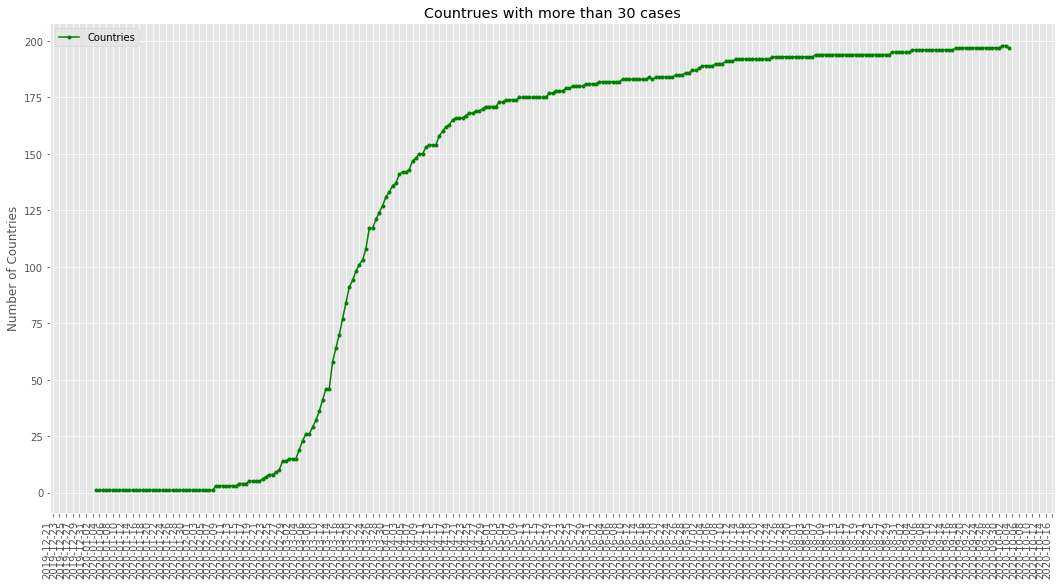

In [4]:
# Количество стран в динамике с колличеством кейсов более заданного числа

num_cases = 30

df_covid_src_countries = df_covid_src.loc[df_covid_src.Cases > num_cases]
df_covid_src_countries = df_covid_src_countries.groupby([df_covid_src_countries.index])['Country'].count()

print(f'Total Countries: {df_covid_src_countries.max()}')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,9), sharex=True, sharey=True)
axes.plot(df_covid_src_countries, linestyle='-',color='g', marker='.', label='Countries')
axes.set_title(f'Countrues with more than {num_cases} cases') #Задать название графика
axes.legend(loc='upper left') #Вывод легенды на графике или plt.legend(loc='best') для одного графика
axes.set_ylabel('Number of Countries', rotation=90) #Подпись у оси у с разворотом на 90 градусов
plt.xticks(rotation=90, ha="right")
myFmt = mdates.DateFormatter('%Y-%m-%d')
axes.xaxis.set_major_formatter(myFmt)
axes.xaxis.set_major_locator(ticker.MultipleLocator(2)) # или plt.gca().
plt.show()
# 192

Total cases: 34364595


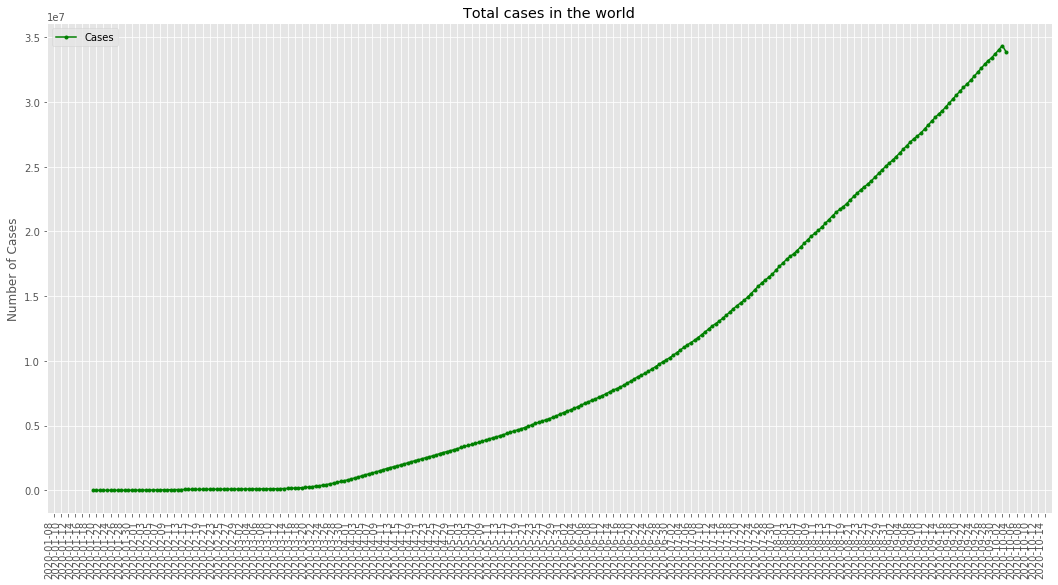

In [5]:
# Количество кейсов по всему миру

num_cases = 100

df_covid_src_countries = df_covid_src.loc[df_covid_src.Cases > num_cases]
df_covid_src_countries = df_covid_src_countries.groupby([df_covid_src_countries.index])['Cases'].sum()

print(f'Total cases: {df_covid_src_countries.max()}')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,9), sharex=True, sharey=True)
axes.plot(df_covid_src_countries, linestyle='-',color='g', marker='.', label='Cases')
axes.set_title(f'Total cases in the world') #Задать название графика
axes.legend(loc='upper left') #Вывод легенды на графике или plt.legend(loc='best') для одного графика
axes.set_ylabel('Number of Cases', rotation=90) #Подпись у оси у с разворотом на 90 градусов
plt.xticks(rotation=90, ha="right")
myFmt = mdates.DateFormatter('%Y-%m-%d')
axes.xaxis.set_major_formatter(myFmt)
axes.xaxis.set_major_locator(ticker.MultipleLocator(2)) # или plt.gca().
plt.show() # 6026460 6833924 9951133 13298430 19853543

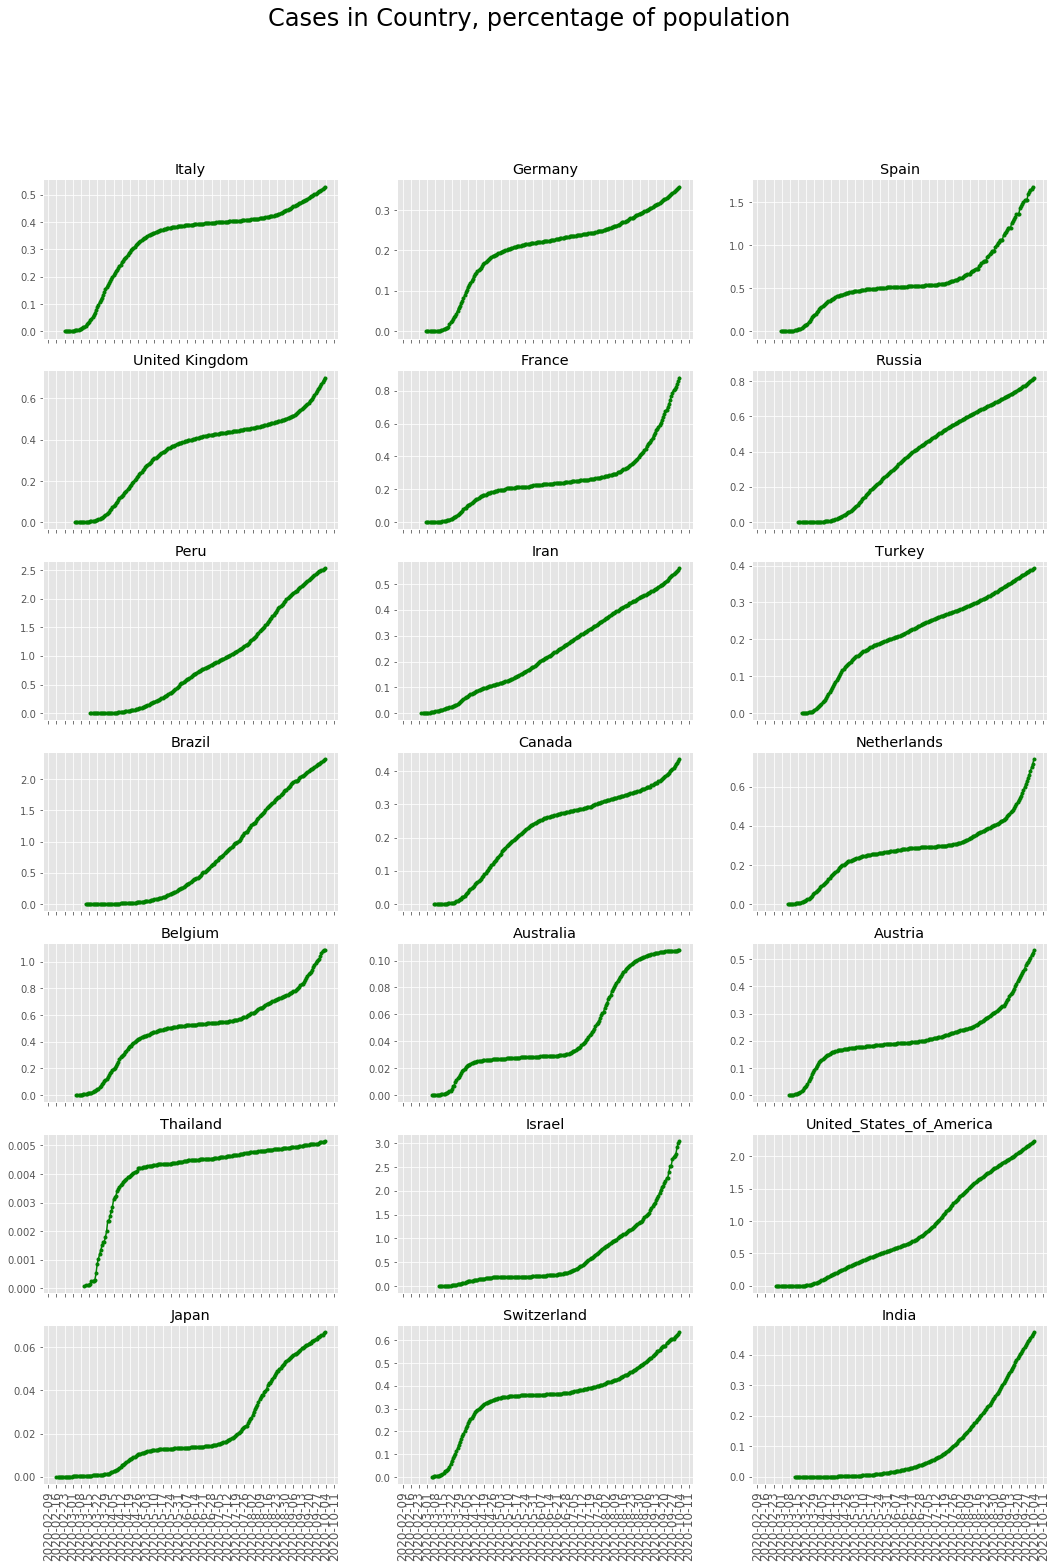

In [6]:
countries = ['Italy', 'Germany', 'Spain', 'United Kingdom', 'France', 'Russia',
             'Peru', 'Iran', 'Turkey', 'Brazil', 'Canada', 'Netherlands',
             'Belgium', 'Australia', 'Austria', 'Thailand', 'Israel', 'United_States_of_America',
             'Japan', 'Switzerland', 'India']

num_cases = 50
case_type_key = 'CasesPopPer' # CasesPopPer / Cases / Deaths / DeathsCasesPer

case_type_dict = {'CasesPopPer':'Cases in Country, percentage of population',
                  'Cases':'Cases in Countries', 'Deaths':'Deaths in Country',
                  'DeathsCasesPer':'Deaths in Country, percentage of Cases'}

ncols = 3

nrows = math.ceil(len(countries)/ncols)

df_temp = df_covid_src.loc[(df_covid_src.Country.isin(countries)) & (df_covid_src.Cases > num_cases)]

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 24), sharex=True)

country_ind = 0

for nrow in range(nrows):
    for ncol in range(ncols):
        try:
            country = countries[country_ind]
        except:
            pass
        finally:
            axes[nrow, ncol].plot(df_temp.loc[df_temp.Country == country, case_type_key],
                                  linestyle='-',color='g', marker='.', label=country)
            axes[nrow, ncol].set_title(f'{country}') #Задать название графика
            axes[nrow, ncol].set_xticklabels(labels=df_temp.index, rotation=90, fontsize='large')
            myFmt = mdates.DateFormatter('%Y-%m-%d')
            axes[nrow, ncol].xaxis.set_major_formatter(myFmt)
            axes[nrow, ncol].xaxis.set_major_locator(ticker.MultipleLocator(7))
            country_ind += 1
            
fig.suptitle(case_type_dict[case_type_key], fontsize=24)
plt.show()

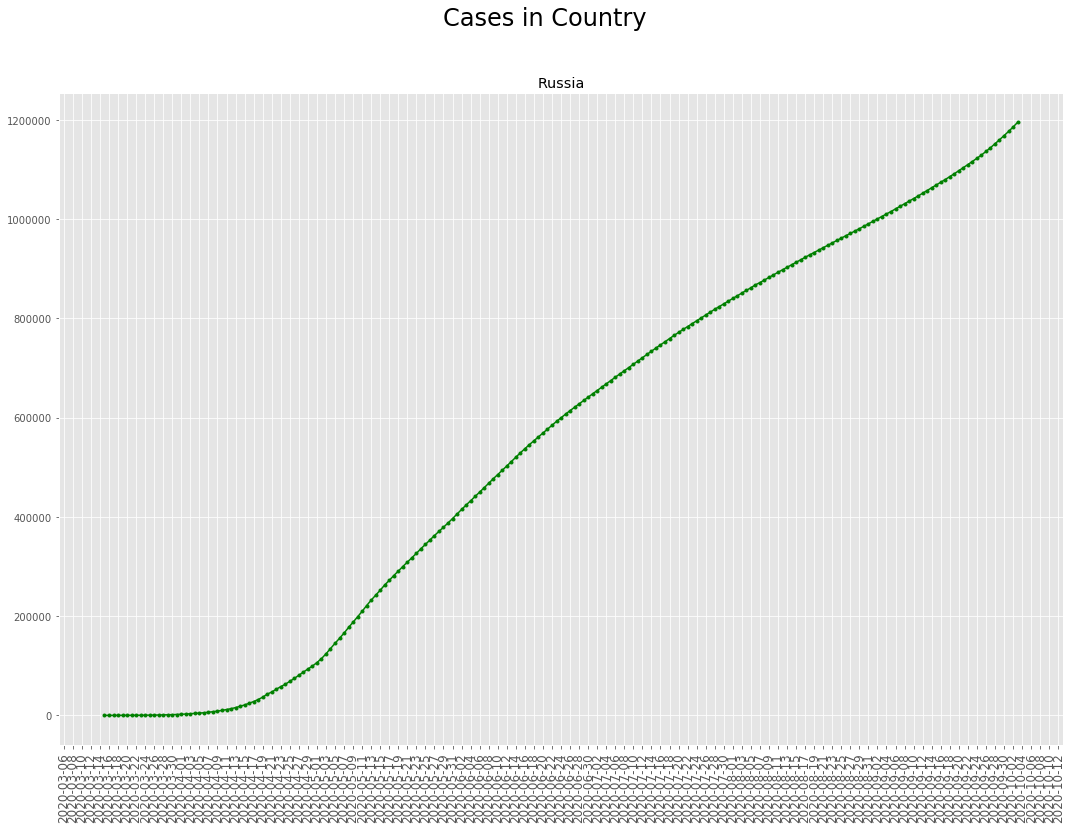

In [7]:
country = 'Russia' # Russia, China, Israel

num_cases = 50
case_type_key = 'Cases' # CasesPopPer / Cases / Deaths / DeathsCasesPer

case_type_dict = {'CasesPopPer':'Cases in Country, percentage of population',
                  'Cases':'Cases in Country', 'Deaths':'Deaths in Country',
                  'DeathsCasesPer':'Deaths in Country, percentage of Cases'}

df_temp = df_covid_src.loc[(df_covid_src.Cases > num_cases)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 12), sharex=True)

axes.plot(df_temp.loc[df_temp.Country == country, case_type_key],
                      linestyle='-',color='g', marker='.', label=country)
axes.set_title(f'{country}') #Задать название графика
axes.set_xticklabels(labels=df_temp.index, rotation=90, fontsize='large')
myFmt = mdates.DateFormatter('%Y-%m-%d')
axes.xaxis.set_major_formatter(myFmt)
axes.xaxis.set_major_locator(ticker.MultipleLocator(2))

fig.suptitle(case_type_dict[case_type_key], fontsize=24)
plt.show()

In [8]:
death_toll_rus_dtp = (16981 * 100) / df_covid_src.loc[df_covid_src.Country == 'Russia', 'Population'].max()
population_rus = df_covid_src.loc[df_covid_src.Country == 'Russia', 'Population'].max()
death_toll_rus_covid = (df_covid_src.loc[df_covid_src.Country == 'Russia', 'Deaths'].max() * 100) / df_covid_src.loc[df_covid_src.Country == 'Russia', 'Population'].max()
print(f'''Кол-во погибших в ДТП в России за 2019 год: 16981 шт. ({death_toll_rus_dtp:.3f}%)
Кол-во погибших от COVID-19 в России: {death_toll_rus_covid:.5f}%\n
Кол-во погибших в ДТП в России за 2019 год в перерасчете на месяц: {round(16981/12)} шт. ({round(16981/12)/population_rus:.7f})%.
Кол-во погибших от COVID-19 в России всего: {df_covid_src.loc[df_covid_src.Country == 'Russia', 'Deaths'].max()} шт. ({76/population_rus:.7f})%''')

Кол-во погибших в ДТП в России за 2019 год: 16981 шт. (0.012%)
Кол-во погибших от COVID-19 в России: 0.01445%

Кол-во погибших в ДТП в России за 2019 год в перерасчете на месяц: 1415 шт. (0.0000097)%.
Кол-во погибших от COVID-19 в России всего: 21077 шт. (0.0000005)%


In [8]:
death_toll_rus_dtp = (16981 * 100) / df_covid_src.loc[df_covid_src.Country == 'Russia', 'Population'].max()
population_rus = df_covid_src.loc[df_covid_src.Country == 'Russia', 'Population'].max()
death_toll_rus_covid = (df_covid_src.loc[df_covid_src.Country == 'Russia', 'Deaths'].max() * 100) / df_covid_src.loc[df_covid_src.Country == 'Russia', 'Population'].max()
print(f'''Кол-во погибших в ДТП в России за 2019 год: 16981 шт. ({death_toll_rus_dtp:.3f}%)
Кол-во погибших от COVID-19 в России: {death_toll_rus_covid:.5f}%\n
Кол-во погибших в ДТП в России за 2019 год в перерасчете на месяц: {round(16981/12)} шт. ({round(16981/12)/population_rus:.7f})%.
Кол-во погибших от COVID-19 в России всего: {df_covid_src.loc[df_covid_src.Country == 'Russia', 'Deaths'].max()} шт. ({76/population_rus:.7f})%''')

Кол-во погибших в ДТП в России за 2019 год: 16981 шт. (0.012%)
Кол-во погибших от COVID-19 в России: 0.00146%

Кол-во погибших в ДТП в России за 2019 год в перерасчете на месяц: 1415 шт. (0.0000098)%.
Кол-во погибших от COVID-19 в России всего: 2116 шт. (0.0000005)%


### Developments

In [9]:
df_covid_src.head()

,Cases,Deaths,Country,Population,CasesPopPer,DeathsCasesPer
RepDate,,,,,,
2019-12-31,0,0,Afghanistan,37172386,0.0,NaN
2020-01-01,0,0,Afghanistan,37172386,0.0,NaN
2020-01-02,0,0,Afghanistan,37172386,0.0,NaN
2020-01-03,0,0,Afghanistan,37172386,0.0,NaN
2020-01-04,0,0,Afghanistan,37172386,0.0,NaN


In [11]:
df_covid_src.groupby('Country')['Cases'].sum().sort_values(ascending=False)[:17]

Country
United_States_of_America    125574612
Brazil                       34397689
Russia                       24229079
Spain                        20120986
Italy                        19690488
United Kingdom               18711821
Germany                      14996869
India                        13353388
France                       12219722
Iran                         11805294
Turkey                       11710674
China                        11701725
Peru                          9636077
Chile                         7028548
Canada                        6052025
Mexico                        6043642
Saudi_Arabia                  5620535
Name: Cases, dtype: int64